In [1]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,seaborn,sklearn,fbprophet,xgboost,lightgbm,catboost

/opt/conda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CPython 3.6.6
IPython 7.8.0

numpy 1.18.4
scipy 1.4.1
pandas 1.0.3
matplotlib 3.2.1
seaborn 0.10.1
sklearn 0.0
fbprophet 0.6
xgboost 1.1.0
lightgbm 2.3.1
catboost 0.23.1

compiler   : GCC 7.3.0
system     : Linux
release    : 4.19.76-linuxkit
machine    : x86_64
processor  : 
CPU cores  : 2
interpreter: 64bit


In [45]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           1991         195         922           0         873        1655
Swap:          1023         373         650


In [46]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

In [47]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

In [48]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


A plot with seaborn

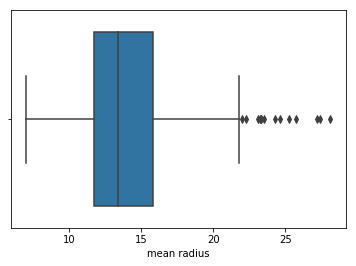

In [49]:
sns.boxplot(x='mean radius', data=df);

In [50]:
import xgboost

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xgb = xgboost.XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
prediction = xgb.predict_proba(X_test)

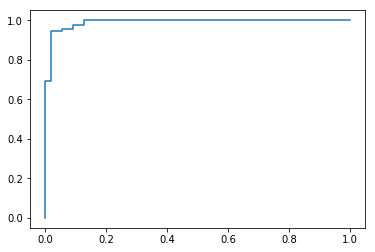

In [52]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);

In [53]:
!vw --version

8.5.0


In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [55]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

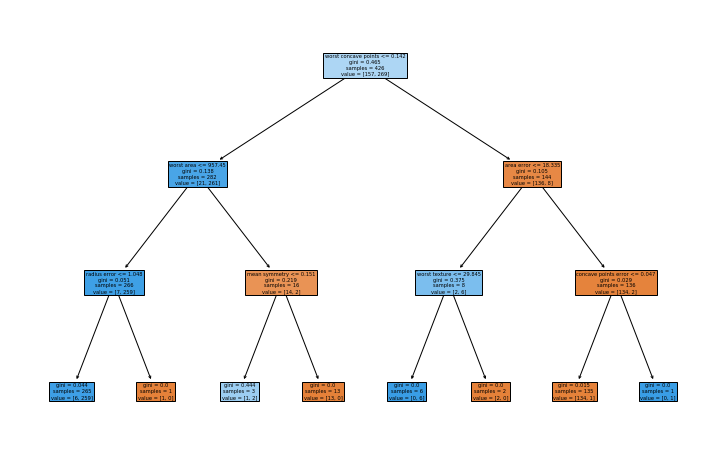

In [56]:
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=cancer.feature_names, filled=True);

In [57]:
!pip freeze

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
asn1crypto==1.2.0
astroid==2.3.2
astropy==3.2.2
atomicwrites==1.3.0
attrs==19.3.0
Babel==2.7.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.8.1
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
catboost==0.23.1
certifi==2019.9.11
cffi==1.13.0
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
cmdstanpy==0.4.0
colorama==0.4.1
conda==4.7.12
conda-build==3.11.0
conda-package-handling==1.6.0
conda-verify==3.0.0
contextlib2==0.6.0
convertdate==2.2.0
cryptography==2.3.1
cycler==0.10.0
Cython==0.29.13
cytoolz==0.10.0
dask==2.6.0
decorator==4.4.0
defusedxml==0.6.0
distributed==2.6.0
docutils==0.15.2
entrypoints==0.3
ephem==3.7.

In [59]:
%%bash
for i in 'numpy' 'scipy' 'pandas' 'matplotlib' 'seaborn' 'sklearn' 'fbprophet' 'xgboost' 'lightgbm' 'catboost'
do
echo pip install --user $i -U
pip install --user $i -U
done

pip install --user numpy -U
Requirement already up-to-date: numpy in /notebooks/home/.local/lib/python3.6/site-packages (1.18.4)
pip install --user scipy -U
Requirement already up-to-date: scipy in /notebooks/home/.local/lib/python3.6/site-packages (1.4.1)
pip install --user pandas -U
Requirement already up-to-date: pandas in /notebooks/home/.local/lib/python3.6/site-packages (1.0.3)
pip install --user matplotlib -U
Requirement already up-to-date: matplotlib in /notebooks/home/.local/lib/python3.6/site-packages (3.2.1)
pip install --user seaborn -U
Requirement already up-to-date: seaborn in /notebooks/home/.local/lib/python3.6/site-packages (0.10.1)
pip install --user sklearn -U
Requirement already up-to-date: sklearn in /notebooks/home/.local/lib/python3.6/site-packages (0.0)
pip install --user fbprophet -U
Requirement already up-to-date: fbprophet in /notebooks/home/.local/lib/python3.6/site-packages (0.6)
pip install --user xgboost -U
Requirement already up-to-date: xgboost in /note

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the